In [84]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
 
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [27]:
final_dataframe = pd.read_csv('./data/sells_time_series.csv', index_col=0)
final_dataframe.index = pd.to_datetime(final_dataframe.index)

In [3]:
def return_series(df, name, key_words = None):
    """ 
    :param df: final_dataframe.
    :param name: nazwa wybrenej grupy (klastra) produktów
    :param key_words: key_words to lista słów dla których ma być wyszukany trend. Jeśli nie podacie nic, to domyślnie 
                      do key_words trafi nazwa produktów name
    """
    
    if key_words is None:
        key_words = [name]

    pytrends = TrendReq()
    pytrends.build_payload(kw_list = key_words, timeframe='2018-01-01 2021-02-28', geo='PL')
    trends = pytrends.interest_over_time().resample('MS').sum().drop('isPartial', axis = 1)
    
    sells = df[name]
    return sells, trends

In [53]:
sells, trends = return_series(df = final_dataframe, name ='lampa')

In [90]:
def run_ARIMA(data, order):
    
    # Tworzę model na podstawie 12 miesiący i przewiduję jeden miesiąc do przodu
    window = [i for i in range(len(data) - 12 + 1)]

    predictions = []
    for w in window:
        history = data.values[w: w+12]
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()[0]
        predictions.append(output)
    
    # Dodaje początkowe 12 wartości, żeby było łatwiej robić wykresy
    predictions = data.values[:12].tolist() + predictions
    return predictions

In [91]:
sells_preds = run_ARIMA(sells, (5,1,0))

C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
trends_preds = run_ARIMA(trends, (5,1,0))

C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\PiotrGrabysz\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


LinAlgError: LU decomposition error.

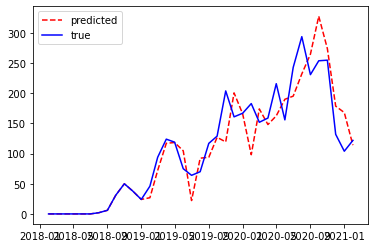

In [94]:
plt.plot(sells.index, sells_preds[:-1], linestyle = '--', color='red', label='predicted')
pyplot.plot(sells, color='blue', label='true')
pyplot.legend()
pyplot.show()

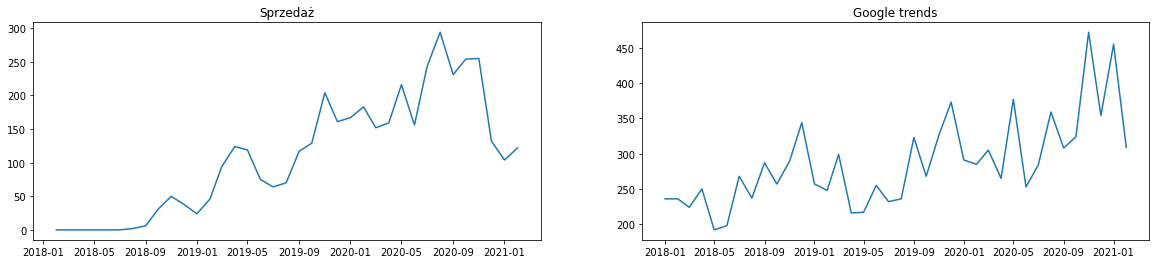

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (20,4))

ax[0].plot(sells)
ax[0].set_title('Sprzedaż')
ax[1].plot(trends)
ax[1].set_title("Google trends")
plt.show()

In [100]:
sells_decomposed = seasonal_decompose(sells, model='additive', period = 12)
trend_decomposed = seasonal_decompose(trends, model='additive', period = 12)

In [103]:
sells_decomposed.trend

2018-02-01           NaN
2018-03-01           NaN
2018-04-01           NaN
2018-05-01           NaN
2018-06-01           NaN
2018-07-01           NaN
2018-08-01     14.500000
2018-09-01     20.333333
2018-10-01     29.416667
2018-11-01     39.541667
2018-12-01     47.625000
2019-01-01     53.416667
2019-02-01     58.916667
2019-03-01     66.375000
2019-04-01     75.083333
2019-05-01     85.583333
2019-06-01     97.125000
2019-07-01    108.208333
2019-08-01    119.875000
2019-09-01    128.000000
2019-10-01    131.875000
2019-11-01    137.375000
2019-12-01    144.791667
2020-01-01    155.625000
2020-02-01    172.416667
2020-03-01    186.500000
2020-04-01    196.458333
2020-05-01    203.791667
2020-06-01    204.708333
2020-07-01    200.875000
2020-08-01    195.708333
2020-09-01           NaN
2020-10-01           NaN
2020-11-01           NaN
2020-12-01           NaN
2021-01-01           NaN
2021-02-01           NaN
Name: trend, dtype: float64

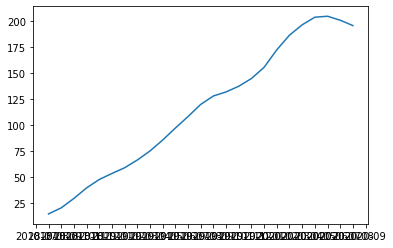

In [98]:
plt.plot(sells_decomposed.trend)

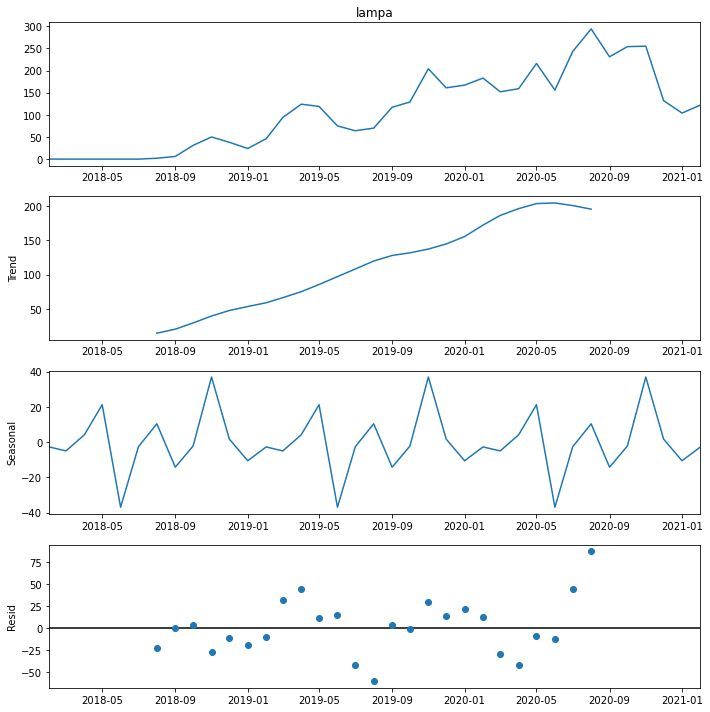

In [102]:
plt.rcParams.update({'figure.figsize': (10,10)})
sells_decomposed.plot()
plt.show()

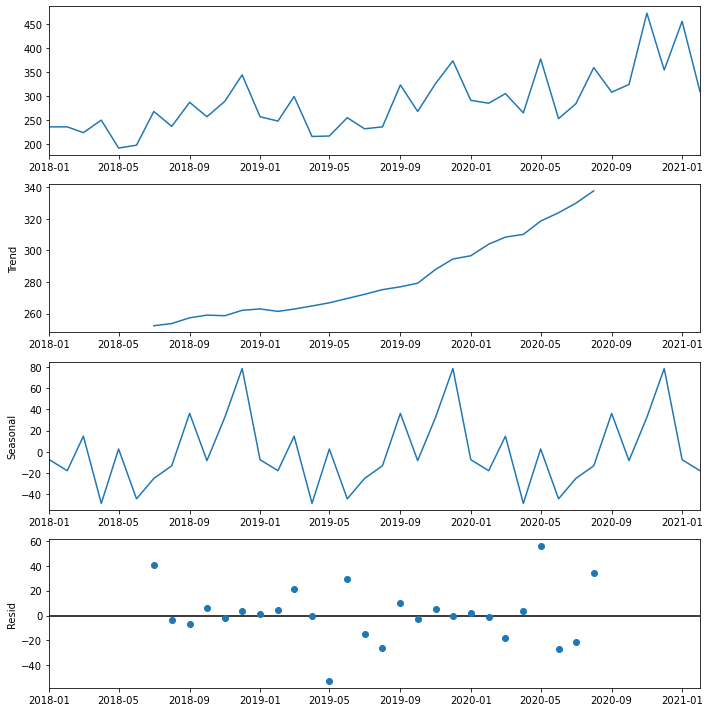

In [59]:
trend_decomposed.plot()
plt.show()

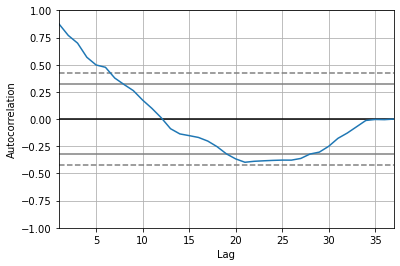

In [7]:
autocorrelation_plot(sells)
plt.show()